In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Checking for null values, data types, shape

In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Splitting into numerical and categorical data

In [6]:
binary_cols = ['FastingBS', 'HeartDisease']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(binary_cols)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = cat_cols + binary_cols
print("Num columns:", num_cols.tolist())
print("Cat columns:", cat_cols)


Num columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Cat columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']


Univariate analysis: one feature at a time

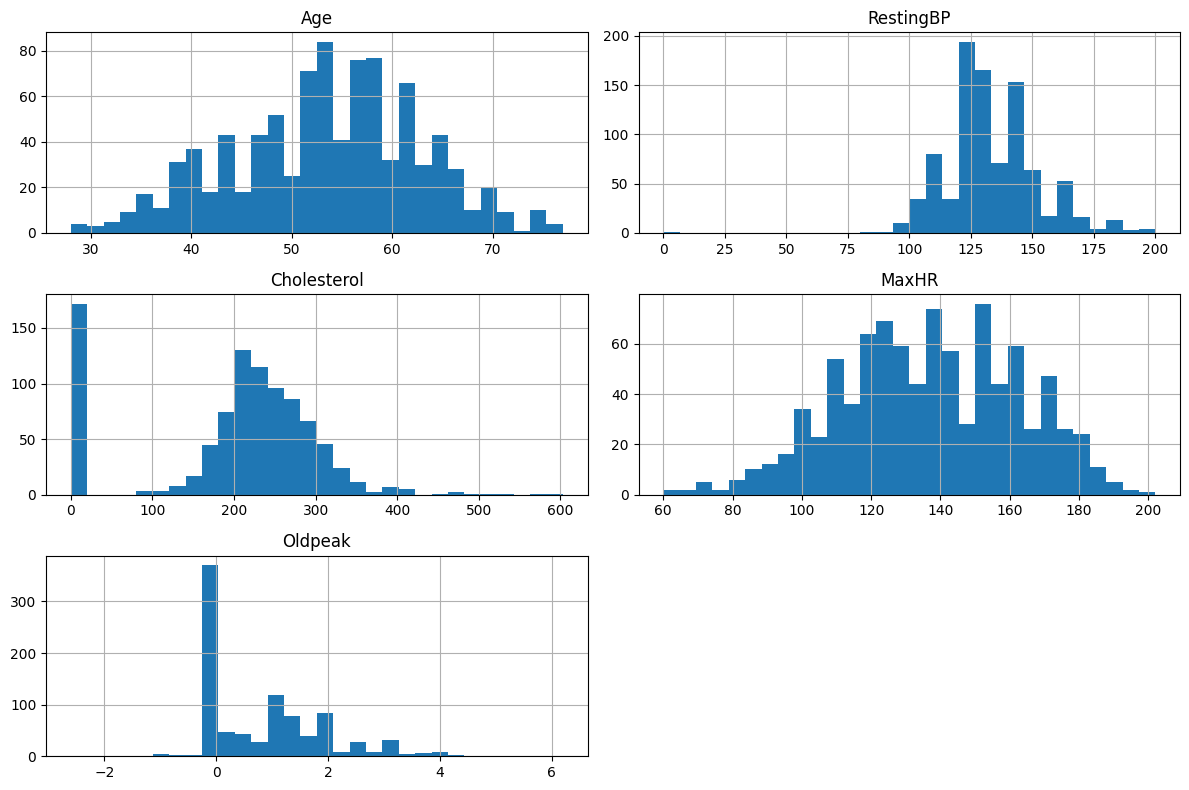

In [7]:
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()

In [8]:
for col in cat_cols:
    print(df[col].value_counts())
    print("-" * 40)


Sex
M    725
F    193
Name: count, dtype: int64
----------------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------------------
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------------------
FastingBS
0    704
1    214
Name: count, dtype: int64
----------------------------------------
HeartDisease
1    508
0    410
Name: count, dtype: int64
----------------------------------------


Bivariate analysis: features vs target

In [9]:
for col in cat_cols:
    print(df.groupby(col)['HeartDisease'].mean().sort_values(ascending=False))

Sex
M    0.631724
F    0.259067
Name: HeartDisease, dtype: float64
ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64
RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64
ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64
ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64
FastingBS
1    0.794393
0    0.480114
Name: HeartDisease, dtype: float64
HeartDisease
1    1.0
0    0.0
Name: HeartDisease, dtype: float64


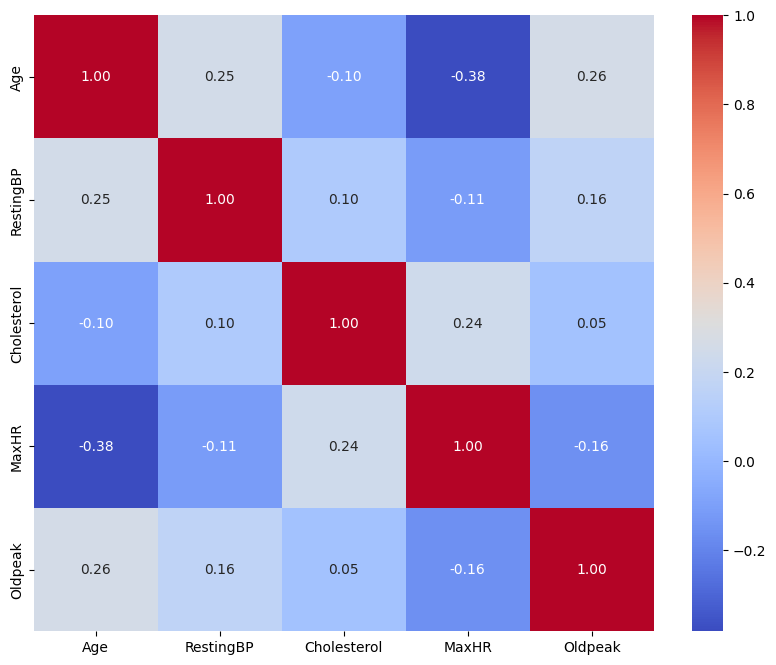

In [10]:
import seaborn as sns 
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0}).astype(int)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0}).astype(int)

In [13]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
numerical = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
cate = ['ChestPainType', 'RestingECG', 'ST_Slope']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers = [
        ("Numerical", StandardScaler(), numerical),
        ("Categorical", OneHotEncoder(handle_unknown='ignore'), cate)
    ]
)

In [23]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score

In [27]:
def model_accuracy(og, pred):
    report = classification_report(og, pred)
    f1 = f1_score(og, pred)
    recall = recall_score(og, pred)
    acc = accuracy_score(og, pred)
    return report, f1, recall, acc

In [31]:
classifiers = {"RandomForestClassifier": RandomForestClassifier(), "GradientBoostingClassifier": GradientBoostingClassifier(), "AdaBoostClassifier": AdaBoostClassifier(), "LogisticRegression": LogisticRegression()}
for i in range(len(list(classifiers))):
    model = list(classifiers.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    report, f1, recall, acc = model_accuracy(y_train, y_train_pred)
    report1, f11, recall1, acc1 = model_accuracy(y_test, y_test_pred)

    print(list(classifiers.keys())[i])
    print('Model performance for Training set')
    print(f"- Accuracy: {acc:0.4f}")
    print(f"- F1 score: {f1:0.4f}")
    print(f"- Recall: {recall:0.4f}")
    print(f"- Report:\n{report}")

    print('-----------------------------------')

    print('Model performance for Testing set')
    print(f"- Accuracy: {acc1:0.4f}")
    print(f"- F1 score: {f11:0.4f}")
    print(f"- Recall: {recall1:0.4f}")
    print(f"- Report:\n{report1}")


    print('='*35)
    print('\n')

RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Recall: 1.0000
- Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       344

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642

-----------------------------------
Model performance for Testing set
- Accuracy: 0.8768
- F1 score: 0.8938
- Recall: 0.8720
- Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



GradientBoostingClassifier
Model performance for Training set
- Accuracy: 0.9455
- F1 

In [43]:
random_forest = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

gradient_boost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.85, 1.0]
}

ada_boost = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=2),
                       DecisionTreeClassifier(max_depth=3)]
}

logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 1],
    'solver': ['liblinear']
}

In [49]:
hyper = {"RandomForestClassifier": [RandomForestClassifier(random_state=42), random_forest], 
"GradientBoostingClassifier": [GradientBoostingClassifier(random_state=42), gradient_boost], 
"AdaBoostClassifier": [AdaBoostClassifier(random_state=42), ada_boost], 
"LogisticRegression": [LogisticRegression(random_state=42), logistic]}
best = {}
for i in range(len(list(hyper))):
    model = list(hyper.values())[i][0]
    random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = list(hyper.values())[i][1],
    n_iter = 20,
    scoring = 'f1',
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
    )
    random_search.fit(X_train, y_train)
    best[list(hyper.keys())[i]] = random_search.best_params_
for keys, values in best.items():
    print(f"{keys}: {values}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

/Users/anshpatel/Documents/Python/Project/Heart Failure/.venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:324: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [46]:
after_hyper = {"RandomForestClassifier": RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth= 20), 
"GradientBoostingClassifier": GradientBoostingClassifier(subsample = 0.85, n_estimators = 100, min_samples_split = 5, min_samples_leaf = 2, max_depth = 3, learning_rate = 0.05), 
"AdaBoostClassifier": AdaBoostClassifier(n_estimators = 100, learning_rate = 0.05, estimator = DecisionTreeClassifier(max_depth=3)),
"LogisticRegression": LogisticRegression(solver = 'liblinear', l1_ratio = 0, C = 1)}
for i in range(len(list(after_hyper))):
    model = list(after_hyper.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    report, f1, recall, acc = model_accuracy(y_train, y_train_pred)
    report1, f11, recall1, acc1 = model_accuracy(y_test, y_test_pred)

    print(list(after_hyper.keys())[i])
    print('Model performance for Training set')
    print(f"- Accuracy: {acc:0.4f}")
    print(f"- F1 score: {f1:0.4f}")
    print(f"- Recall: {recall:0.4f}")
    print(f"- Report:\n{report}")

    print('-----------------------------------')

    print('Model performance for Testing set')
    print(f"- Accuracy: {acc1:0.4f}")
    print(f"- F1 score: {f11:0.4f}")
    print(f"- Recall: {recall1:0.4f}")
    print(f"- Report:\n{report1}")


    print('='*35)
    print('\n')

RandomForestClassifier
Model performance for Training set
- Accuracy: 0.9361
- F1 score: 0.9415
- Recall: 0.9593
- Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       298
           1       0.92      0.96      0.94       344

    accuracy                           0.94       642
   macro avg       0.94      0.93      0.94       642
weighted avg       0.94      0.94      0.94       642

-----------------------------------
Model performance for Testing set
- Accuracy: 0.8804
- F1 score: 0.8978
- Recall: 0.8841
- Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.91      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



GradientBoostingClassifier
Model performance for Training set
- Accuracy: 0.9081
- F1 